In [14]:
#importing all the libraries needed
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.model_selection import train_test_split

np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values


In [15]:
#generating dataset
def generate_binary_dataset(N, M):
    X = np.random.randint(0, 2, size=(N, M))  # binary features (0/1)
    y = np.random.randint(0, 2, size=N)       # binary target
    return X, y

In [16]:
#defining number of samples and number of features
N_list=[10,200,300,400,500,1000,2000,5000]
M_list=[10,100,200]

result={}

for n in N_list:
    for m in M_list:
        X,y= generate_binary_dataset(n,m)
        X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), pd.Series(y), test_size=0.3, random_state=42)
        dt=DecisionTree(criterion='information_gain',max_depth=5)
        time_train_start=time.time()
        dt.fit(X_train,y_train)
        time_train_end=time.time()
        time_test_start=time.time()
        dt.predict(X_test)
        time_test_end=time.time()
        result[(n,m)]=[time_train_end-time_train_start,time_test_end-time_test_start]
        print(f"Loop for N={n}, M={m} completed")

Loop for N=10, M=10 completed
Loop for N=10, M=100 completed
Loop for N=10, M=200 completed
Loop for N=200, M=10 completed
Loop for N=200, M=100 completed
Loop for N=200, M=200 completed
Loop for N=300, M=10 completed
Loop for N=300, M=100 completed
Loop for N=300, M=200 completed
Loop for N=400, M=10 completed
Loop for N=400, M=100 completed
Loop for N=400, M=200 completed
Loop for N=500, M=10 completed
Loop for N=500, M=100 completed
Loop for N=500, M=200 completed
Loop for N=1000, M=10 completed
Loop for N=1000, M=100 completed
Loop for N=1000, M=200 completed
Loop for N=2000, M=10 completed
Loop for N=2000, M=100 completed
Loop for N=2000, M=200 completed
Loop for N=5000, M=10 completed
Loop for N=5000, M=100 completed
Loop for N=5000, M=200 completed


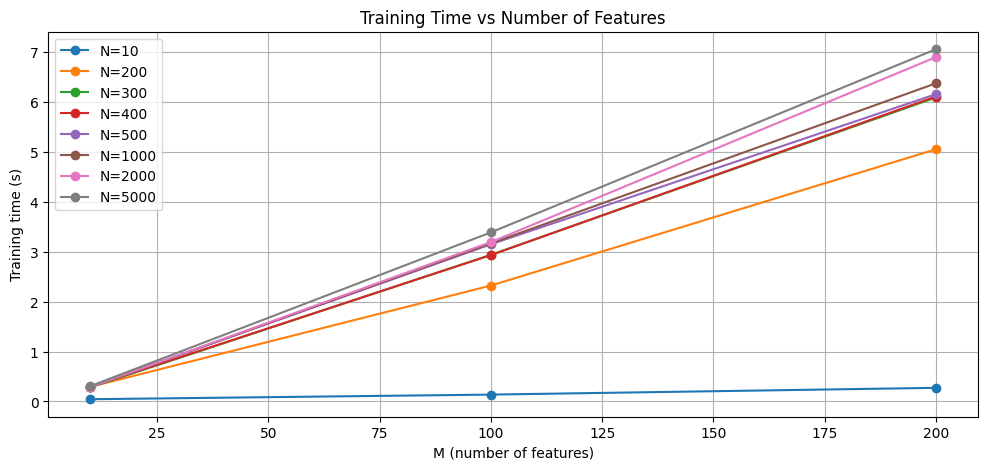

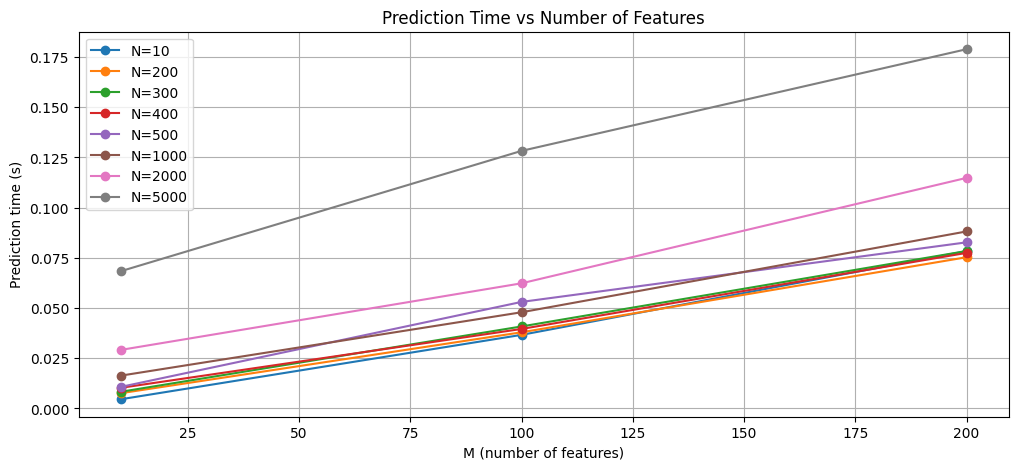

In [17]:
# convert result dict into DataFrame
df = pd.DataFrame(
    [(n, m, t[0], t[1]) for (n, m), t in result.items()],
    columns=["N", "M", "train_time", "predict_time"]
)

# plot training time vs M for different N
plt.figure(figsize=(12,5))

for n in sorted(df["N"].unique()):
    subset = df[df["N"] == n]
    plt.plot(subset["M"], subset["train_time"], marker='o', label=f"N={n}")

plt.xlabel("M (number of features)")
plt.ylabel("Training time (s)")
plt.title("Training Time vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()

# plot prediction time vs M for different N
plt.figure(figsize=(12,5))

for n in sorted(df["N"].unique()):
    subset = df[df["N"] == n]
    plt.plot(subset["M"], subset["predict_time"], marker='o', label=f"N={n}")

plt.xlabel("M (number of features)")
plt.ylabel("Prediction time (s)")
plt.title("Prediction Time vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()


For training of a decision tree if we fix the number of samples N then the time complexity should only depend on the number of features present, this is verified by the graph. i.e. we can observe that time complexity is proportional to M

The graph for Prediction time vs number of features should ideally be constant for a fixed N , but in our code for prediction we are performing one hot encoding before calling the predict function leading to dependence on M, so time complexity is proportional to both M and N
